# Ramsey King
# DSC 540 - Data Preparation
# Aug 14, 2021
# Milestone 5

### _Cleaning/Formatting Flat File Source_
### Now that you have cleaned and transformed your 3 datasets, you need to load them into a database. You can choose what kind of database (SQLLite or MySQL, Postgre SQL are all free options). You will want to load each dataset into SQL Lite as an individual table and then you must join the datasets together in Python into 1 dataset.
### Once all the data is merged together in your database, create 5 visualizations that demonstrate the data you have cleansed. You should have at least 2 visualizations that have data from more than one source (meaning, if you have 3 tables, you must have visualizations that span across 2 of the tables – you are also welcome to use your consolidated dataset that you created in the previous step, if you do that, you have met this requirement).

In [11]:
import pandas as pd
import sqlite3
from sqlite3 import Error

In [12]:
# Connect to finalproject db and make sure it works
try:
    conn = sqlite3.connect('finalprojectdb')
    print(sqlite3.version)
except Error as e:
    print(e)
finally:
    if conn:
        conn.close()

2.6.0


Add the scripture reference dataset into the finalprojectdb

In [13]:
# Add scripture reference dataset into the finalprojectdb
scripture_reference_df = pd.read_csv('sr_wide_format.csv')
with sqlite3.connect('finalprojectdb') as conn:

    scripture_reference_df.to_sql('scriptures', conn, if_exists='replace', index=False)
    cursor = conn.cursor()
    for row in cursor.execute('''SELECT * from scriptures WHERE year = "1999"'''):
        print(row)

(1999, 'Mosiah 23:21; Jarom 1:11; Alma 33:2; Alma 14:1; Alma 30:28; 1 Nephi 16:18; D&C 121:46; John 5:39; John 3:16; Mosiah 10:14; D&C 130:7 D&C 18:10; John 21:15–17; Luke 15:1–7; John 10:27 Alma 30:60 at 6:30; about 8:00; about 7:00; at 2:30; Abraham 4:18; or 8:00 John 1:45–47; John 14:6; Mosiah 2:17 John 14:26; John 14:18; D&C 8:2; D&C 121:45 John 14:21; Luke 14:16; Acts 10:40; Alma 11:42; Luke 21:1–4; Mosiah 16:8; D&C 50:24; John 18:37; Mosiah 18:8–9; Luke 18:16; Mosiah 3:19; Mosiah 4:26; Alma 5:13–14; D&C 59:23; Alma 22:18; John 21:25; John 18:38; Acts 10:34 Luke 18:29–30 Hosea 8:7; D&C 1:4; Luke 13:34; D&C 1:38 Alma 34:30–34 Mosiah 3:7; D&C 68:6; Mosiah 16:9; Mosiah 14:3; D&C 90:24; Mark 4:39; D&C 81:5; John 8:12; D&C 101:16; John 16:33; Ether 12:4; John 14:27 Alma 42:15; Moses 1:39; Alma 37:35; John 3:16; Mosiah 29:12; John 14:15; Alma 7:11–12 Alma 5:14; John 19:5; Moses 7:35; Moses 6:57 D&C 15:6; D&C 4:4 Alma 31:8–9; D&C 105:19; Alma 32:28 Acts 9:3–6; Ether 12:27; James 1:22; Jo

In [14]:
# Add conference talks dataset into the finalprojectdb

conference_talks_df = pd.read_csv('talks_in_wide_format.csv')
with sqlite3.connect('finalprojectdb') as conn:
    conference_talks_df.to_sql('talks', conn, if_exists='replace', index=False)
    cursor = conn.cursor()

    for row in cursor.execute("""SELECT * from talks WHERE Year = '1999'"""):
        print(row)

(1999, 'The Church grows ever larger. It touches more and more lives for good. It is spreading over the earth in a wonderful way.\nMy beloved brethren and sisters, we welcome you to this great world conference of the Church. We are grateful for your presence and for the efforts you have made to be here. We are grateful for the association of our brothers and sisters assembled in thousands of halls across the world.\nThe Church grows ever larger. It touches more and more lives for good. It is spreading over the earth in a wonderful way.\nI take the opportunity this morning to advise briefly of the progress we are making toward the goal of 100 working temples in the year 2000.\nSince the first of this year we have dedicated temples in Anchorage, Alaska; Colonia Juárez, Mexico; Madrid, Spain; Bogotá, Colombia; Guayaquil, Ecuador; Spokane, Washington; Columbus, Ohio; and Bismarck, North Dakota—eight in all. Between now and the end of the year, we will dedicate temples in Columbia, South Ca

In [15]:
# Add world history project dataset into the finalprojectdb
   
world_history_df = pd.read_csv('world_history_project_wide_format.csv')
with sqlite3.connect('finalprojectdb') as conn:

    world_history_df.to_sql('world_history', conn, if_exists='replace', index=False)
    cursor = conn.cursor()
    for row in cursor.execute('''SELECT * from world_history WHERE Year = "1999" '''):
        print(row)
        break

(1999, 'A core lesson from the dot-com boom is that even if you have a good idea, it\'s best not to grow too fast too soon. But online grocer Webvan was the The Chrysler 300M is a sports sedan produced by Chrysler from 1999 to 2004. Chrysler Corporation revived the 300 name on the 300M. This time it was In 1996, Blagojevich surrendered his seat in the state house to campaign in Illinois\'s 5th congressional district. The district had long been The Tri-Tone Fascination is the second studio album by guitarist Shawn Lane, first released in 1999 on Eye Reckon Records. A second edition was The Mercedes-Benz W215 is a luxury grand tourer produced by the German automaker Mercedes-Benz between 1999 and 2006. It was sold under the Following the band\'s first real radio success with Cryptic Writings, Megadeth opted to again work with country pop producer Dann Huff in Nashville The Nissan R391 was a prototype racing car built by Nissan and their motorsports counterpart Nismo for competition at th

In [16]:
# First, make sure all 3 tables are in the database:
with sqlite3.connect('finalprojectdb') as conn:
    cursor = conn.cursor()
    cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
    print(cursor.fetchall())

[('scriptures',), ('talks',), ('world_history',)]


In [17]:
# Join the scriptures, talks, and world_history tables together on the column Year (or year)

with sqlite3.connect('finalprojectdb') as conn:

    cursor.execute('PRAGMA foreign_keys = 1')
    sql_string = """SELECT * from scriptures
                    JOIN talks 
                    ON scriptures.year = talks.Year
                    JOIN world_history
                    ON talks.Year = world_history.Year
                    """
    rows = cursor.execute(sql_string)
    # convert the joined 3 tables (talk, scriptures, world_history) into one dataframe.
cols = ['year', 'scripture_references', 'year2', 'talks', 'year3', 'history_headline']
data = [row for row in rows]
the_final_df = pd.DataFrame(data, columns=cols)
the_final_df.head()

,year,scripture_references,year2,talks,year3,history_headline
0,1961,John 8:12; Acts 4:12; Moses 4:3; Matt. 11:28-3...,1961,Clouds hung over the eastern horizon this morn...,1961,"The Ford E-Series, formerly known as the Econo..."
1,1962,Ps. 8:4-5; John 11:25; John 7:17; John 4:23; D...,1962,"""What is man, that thou art mindful of him? an...",1962,"The USS Arizona Memorial, located at Pearl Har..."
2,1963,Ps. 8:4-5; Moses 1:39; Moses 3:17; F 1:13; Gal...,1963,"I pray for your sympathy, your prayers, while ...",1963,"The Equal Pay Act of 1963, Pub. L. No. 88-38, ..."
3,1964,Moses 1:39; D&C 105:39 D&C 29:22; Matt. 25:14-...,1964,My dear brethren and sisters:\nOnly at the las...,1964,"Steven Tyler forms his first serious band, The..."
4,1965,John 17:3; Moses 4:3; John 20:28; John 14:6; M...,1965,Brethren and sisters: It is truly a joy to mee...,1965,Psychedelic garage rock band formed in 1965 in...


In [18]:
# drop the year2 and year3 columns from the_final_df

the_final_df.drop(['year2', 'year3'], axis = 1, inplace=True)
the_final_df.head()

,year,scripture_references,talks,history_headline
0,1961,John 8:12; Acts 4:12; Moses 4:3; Matt. 11:28-3...,Clouds hung over the eastern horizon this morn...,"The Ford E-Series, formerly known as the Econo..."
1,1962,Ps. 8:4-5; John 11:25; John 7:17; John 4:23; D...,"""What is man, that thou art mindful of him? an...","The USS Arizona Memorial, located at Pearl Har..."
2,1963,Ps. 8:4-5; Moses 1:39; Moses 3:17; F 1:13; Gal...,"I pray for your sympathy, your prayers, while ...","The Equal Pay Act of 1963, Pub. L. No. 88-38, ..."
3,1964,Moses 1:39; D&C 105:39 D&C 29:22; Matt. 25:14-...,My dear brethren and sisters:\nOnly at the las...,"Steven Tyler forms his first serious band, The..."
4,1965,John 17:3; Moses 4:3; John 20:28; John 14:6; M...,Brethren and sisters: It is truly a joy to mee...,Psychedelic garage rock band formed in 1965 in...


In [19]:
# import nltk packages
from nltk.util import ngrams
from nltk.corpus import stopwords
import nltk
import matplotlib.pyplot as plt

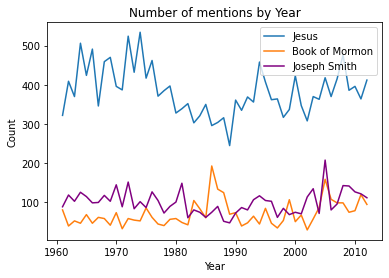

In [21]:
# to plot references to Heavenly Father, Book of Mormon, and Joseph Smith by year (line)

bom_count = [the_final_df['talks'][i].count('Book of Mormon') for i in range(len(the_final_df['talks']))]
j_count = [the_final_df['talks'][i].count('Jesus') for i in range(len(the_final_df['talks']))]
js_count= [the_final_df['talks'][i].count('Joseph Smith') for i in range(len(the_final_df['talks']))]
years = range(1961, 2013, 1)

plt.plot(years, j_count, label='Jesus')
plt.plot(years, bom_count, label='Book of Mormon')
plt.plot(years, js_count, label='Joseph Smith', color='purple')
plt.title('Number of mentions by Year')
plt.ylabel('Count')
plt.xlabel('Year')
plt.legend()
plt.show()

### The next 7 visualizations use data from at least 2 of the 3 tables in the database.

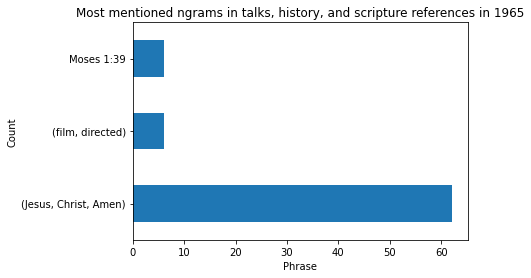

In [58]:
'''
Plot of most frequent talk trigram, most frequent history bigram, most recent scripture reference unigram
for 1965.
'''
def token_processor(column, n_gram_count, year_index):
    stop_words = stopwords.words('english')
    tokenizer = nltk.RegexpTokenizer('\w+')
    punc_removed_tokens = tokenizer.tokenize(the_final_df[column][year_index])
    filtered_tokens = [word for word in punc_removed_tokens if not word.lower() in stop_words]

    if column == 'scripture_references':
        return pd.Series(the_final_df[column][year_index].split('; ')).value_counts()[:1]
    else:
        return pd.Series(ngrams(filtered_tokens, n_gram_count)).value_counts()[:1]

talk_trigram = token_processor('talks', 3, 4)
history_bigram = token_processor('history_headline', 2, 4)
scrip_unigram = token_processor('scripture_references', 1, 4)

a_df = pd.concat([talk_trigram, history_bigram, scrip_unigram], axis=0)
a_df.plot.barh()
plt.title('Most mentioned ngrams in talks, history, and scripture references in 1965')
plt.ylabel('Count')
plt.xlabel('Phrase')
plt.show()

What is the scripture reference to Moses 1:39?

In [69]:
import requests

the_request = requests.get("https://api.nephi.org/scriptures/?q=Moses 1:39").json()
the_request['scriptures'][0]['text']

'For behold, this is my work and my glory--to bring to pass the immortality and eternal life of man.'

Because the world history reference for 1965 has film director as the most used bigram that year, I would like to see
how many times the word 'movie' is used in conference talks for 1965.

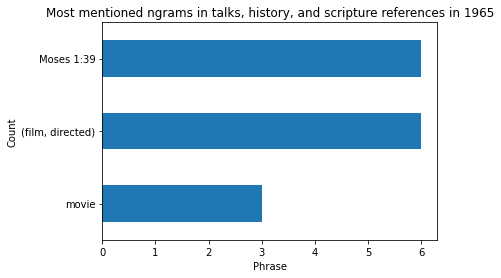

In [54]:
'''
Plot of number of mentions of the word 'movie' in talks, most frequent history bigram, most recent scripture reference unigram
for 1965.
'''
movie_counter = pd.Series({'movie':sum([the_final_df['talks'][4].lower().count('movie')])})
history_bigram = token_processor('history_headline', 2, 4)
scrip_unigram = token_processor('scripture_references', 1, 4)

a_df = pd.concat([movie_counter, history_bigram, scrip_unigram], axis=0)
a_df.plot.barh()
plt.title('Most mentioned ngrams in world history and scripture references and mentions of the word movie in 1965')
plt.ylabel('Count')
plt.xlabel('Phrase')
plt.show()

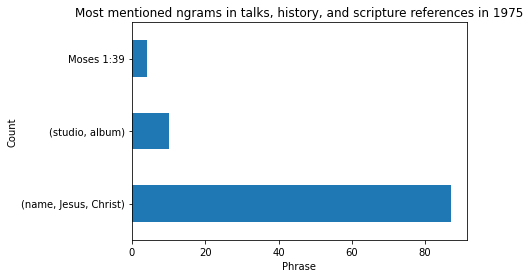

In [23]:
'''
Plot of most frequent talk trigram, most frequent history bigram, most recent scripture reference unigram
for 1975.
'''
talk_trigram = token_processor('talks', 3, 14)
history_bigram = token_processor('history_headline', 2, 14)
scrip_unigram = token_processor('scripture_references', 1, 14)

a_df = pd.concat([talk_trigram, history_bigram, scrip_unigram], axis=0)
a_df.plot.barh()
plt.title('Most mentioned ngrams in talks, history, and scripture references in 1975')
plt.ylabel('Count')
plt.xlabel('Phrase')
plt.show()

Because the world history reference for 1975 has studio album as the most used bigram that year, I would like to see
how many times the word 'music' is used in conference talks for 1975.

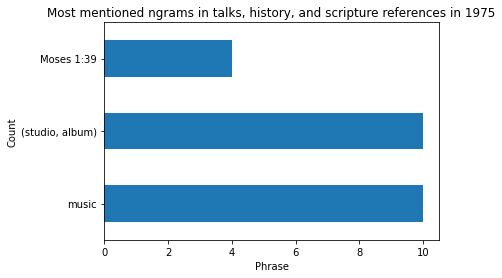

In [56]:
'''
Plot of the word count of 'music' in talks, most frequent history bigram, most recent scripture reference unigram
for 1975.
'''
music_counter = pd.Series({'music':sum([the_final_df['talks'][14].lower().count('music')])})
history_bigram = token_processor('history_headline', 2, 14)
scrip_unigram = token_processor('scripture_references', 1, 14)

a_df = pd.concat([music_counter, history_bigram, scrip_unigram], axis=0)
a_df.plot.barh()
plt.title('Most mentioned ngrams in talks, history, and scripture references in 1975')
plt.ylabel('Count')
plt.xlabel('Phrase')
plt.show()

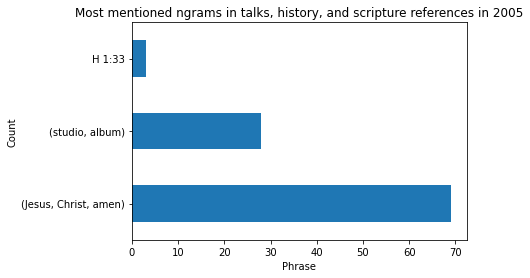

In [24]:
'''
Plot of most frequent talk trigram, most frequent history bigram, most recent scripture reference unigram
for 2005.
'''
talk_trigram = token_processor('talks', 3, 44)
history_bigram = token_processor('history_headline', 2, 44)
scrip_unigram = token_processor('scripture_references', 1, 44)

a_df = pd.concat([talk_trigram, history_bigram, scrip_unigram], axis=0)
a_df.plot.barh()
plt.title('Most mentioned ngrams in talks, history, and scripture references in 2005')
plt.ylabel('Count')
plt.xlabel('Phrase')
plt.show()

"H 1:33" is a typo and should be JS-H 1:33. We will now get that scripture reference.

In [90]:
jsh_133_ref_df = pd.read_json('lds-scriptures-json.txt')
jsh_133_ref_df = jsh_133_ref_df[jsh_133_ref_df['verse_short_title'] == 'JS-H 1:33']
list(jsh_133_ref_df['scripture_text'])

['He called me by name, and said unto me that he was a messenger sent from the presence of God to me, and that his name was Moroni; that God had a work for me to do; and that my name should be had for good and evil among all nations, kindreds, and tongues, or that it should be both good and evil spoken of among all people.']

Because the world history reference for 2005 has studio album as the most used bigram that year as well, I would like to see
how many times the word 'music' is used in conference talks for 2005.

In [ ]:
'''
Plot of the word count of 'music' in talks, most frequent history bigram, most recent scripture reference unigram
for 2005.
'''
music_counter = pd.Series({'music':sum([the_final_df['talks'][44].lower().count('music')])})
history_bigram = token_processor('history_headline', 2, 44)
scrip_unigram = token_processor('scripture_references', 1, 44)

a_df = pd.concat([music_counter, history_bigram, scrip_unigram], axis=0)
a_df.plot.barh()
plt.title('Most mentioned ngrams world history and scripture references, and the word music in 2005')
plt.ylabel('Count')
plt.xlabel('Phrase')
plt.show()

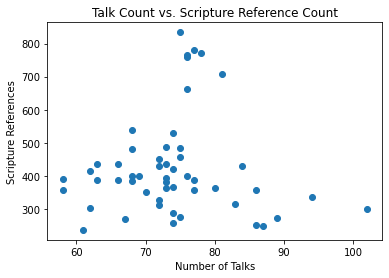

In [25]:
# number of scripture references vs number of talks (scatter plot)
talk_count = [the_final_df['talks'][i].lower().count('amen.') for i in range(len(the_final_df['talks']))]
scripture_ref_count = [the_final_df['scripture_references'][i].count('; ') for i in range(len(the_final_df['scripture_references']))]

plt.scatter(talk_count, scripture_ref_count)
plt.title('Talk Count vs. Scripture Reference Count')
plt.xlabel('Number of Talks')
plt.ylabel('Scripture References')
plt.show()

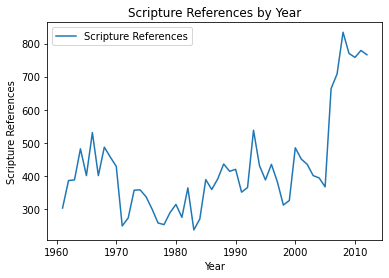

In [28]:
# number of scripture references by year (line chart)
plt.plot(years, scripture_ref_count, label='Scripture References')
plt.title('Scripture References by Year')
plt.xlabel('Year')
plt.ylabel('Scripture References')
plt.legend()
plt.show()

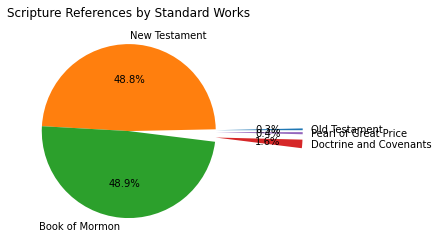

In [48]:
# pie chart of scripture references by book type
import re

ot_book_titles = "Genesis|Exodus|Leviticus|Numbers|Deuteronomy|Joshua|Judges|Ruth|1 Samuel|2 Samuel|1 Kings|2 Kings" \
              "|1 Chronicles|2 Chronicles|Ezra|Nehemiah|Esther|Job|Psalms|Proverbs|Ecclesiastes|Solomon's Song|" \
              "Isaiah|Jeremiah|Lamentations|Ezekiel|Daniel|Hosea|Joel|Amos|Obadiah|Jonah|Micah|Nahum|Habakkuk|" \
              "Zephaniah|Haggai|Zechariah|Malachi"

nt_book_titles = "Matthew|Mark|Luke|John|Acts|Romans|1 Corinthians|2 Corinthians|" \
              "Galatians|Ephesians|Philippians|Colossians|1 Thessalonians|2 Thessalonians|1 Timothy|2 Timothy|" \
              "Titus|Philemon|Hebrews|James|1 Peter|2 Peter|1 John|2 John|3 John|Jude|Revelation|"

bofm_book_titles = "1 Nephi|2 Nephi|Jacob|Enos|Jarom|Omni|Words of Mormon|Mosiah|Alma|Helaman|3 Nephi|4 Nephi|Mormon|" \
                   "Ether|Moroni|"

dc_book_titles = "Doctrine and Covenants"


pofgp_book_titles = "Moses|Abraham|Joseph Smith--Matthew|Joseph Smith--History|Articles of Faith"

ot_short_titles = "Gen.|Ex.|Lev.|Num.|Deut.|Josh.|Judg.|Ruth|1 Sam.|2 Sam.|1 Kgs.|2 Kgs.|1 Chr.|2 Chr.|Ezra|Neh.|Esth." \
                  "|Job|Ps.|Prov.|Eccl.|Song.|Isa.|Jer.|Lam.|Ezek.|Dan.|Hosea|Joel|Amos|Obad.|Jonah|Micah|Nahum|Hab.|" \
                  "Zeph.|Hag.|Zech.|Mal."
nt_short_titles = "Matt.|Mark|Luke|John|Acts|Rom.|1 Cor.|2 Cor.|Gal.|Eph.|Philip.|Col.|1 Thes.|2 Thes.|1 Tim.|2 Tim.|" \
                  "Titus|Philem.|Heb.|James|1 Pet.|2 Pet.|1 Jn.|2 Jn.|3 Jn.|Jude|Rev."
bofm_short_titles = "1 Ne.|2 Ne.|Jacob|Enos|Jarom|Omni|W of M|Mosiah|Alma|Hel.|3 Ne.|4 Ne.|Morm.|Ether|Moro."
dc_short_titles = "D&C"
pofgp_short_titles = "Moses|Abr.|JS-M|JS-H|A of F"

ot_counter, nt_counter, bofm_counter, dc_counter, pofgp_counter = 0, 0, 0, 0, 0
for i in range(len(the_final_df['scripture_references'])):
    ot_counter += len(re.findall(ot_book_titles, the_final_df['scripture_references'][i]))
    ot_counter += len(re.findall(ot_short_titles, the_final_df['scripture_references'][i]))

    nt_counter += len(re.findall(nt_book_titles, the_final_df['scripture_references'][i]))
    nt_counter += len(re.findall(nt_short_titles, the_final_df['scripture_references'][i]))

    bofm_counter += len(re.findall(bofm_book_titles, the_final_df['scripture_references'][i]))
    bofm_counter += len(re.findall(bofm_short_titles, the_final_df['scripture_references'][i]))

    dc_counter += len(re.findall(dc_book_titles, the_final_df['scripture_references'][i]))
    dc_counter += len(re.findall(dc_short_titles, the_final_df['scripture_references'][i]))

    pofgp_counter += len(re.findall(pofgp_book_titles, the_final_df['scripture_references'][i]))
    pofgp_counter += len(re.findall(pofgp_short_titles, the_final_df['scripture_references'][i]))

standard_works = ['Old Testament', 'New Testament', 'Book of Mormon', 'Doctrine and Covenants', 'Pearl of Great Price']
data = [ot_counter, nt_counter, bofm_counter, dc_counter, pofgp_counter]
explode = (1, 0, 0, 1, 1)

plt.pie(data, labels = standard_works, explode = explode, autopct='%1.1f%%')
plt.title('Scripture References by Standard Works')
plt.show()
